## QISKIT

<img src="../images/QC_29.jpg" >

## Useful Links

| Resource             | Link                                      |
|----------------------|-------------------------------------------|
| Qiskit Documentation | https://docs.quantum.ibm.com/guides/hello-world |
| Qiskit GitHub        | https://github.com/Qiskit |
| Qiskit Compser       | https://quantum.ibm.com/composer |

### Introduction

-   **Objective**: Writing the first quantum code, "Hello Quantum".
-   **Gates Used**: Hadamard and CNOT gates.
-   **Goal**: Create entanglement between two qubits.

### Circuit Composer Recap

-   **Hadamard Gate**: Applied to qubit Q0.
-   **CNOT Gate**: Applied between qubits Q0 and Q1.
-   **Measurement**: Added to qubits to observe results.

### Measurement in Quantum Circuits

-   **Purpose**: Convert quantum state into classical bits by measurement.
-   **Outcome**: Collapses quantum state into either 0 or 1.
-   **Expectation**: For an entangled state, expect 50% chance of |00⟩ and 50% chance of |11⟩.

### Circuit Composer Experiment

-   **Initial Setup**:
    -   Add Hadamard gate to Q0.
    -   Add CNOT gate between Q0 and Q1.
    -   Add measurement gates.
-   **Observation**:
    -   Without measurement, expected quantum behavior observed.
    -   With measurement, observed classical probabilities (50% |00⟩, 50% |11⟩).

    <img src="../images/QC_30.jpg" >

### Running the Circuit

-   **Simulation**:
    -   Choose a quantum simulator or real quantum computer.  (e.g., IBM Osaka)
    -   Run the circuit multiple times (shots) to get statistical results.
-   **Shots**: Typically set to 1024 (common in computer science).

    <img src="../images/QC_32.jpg" >

### Expected Results

-   **Entanglement Verification**: Expect approximately 50% |00⟩ and 50% |11⟩.
-   **Histogram**: Shows distribution of results after multiple runs.

    <img src="../images/QC_31.jpg" >

<h1>Implementing in Qiskit</h1>

In [3]:
from qiskit import *

<h3>Create Quantum Circuit:</h3>

In [4]:
circuit = QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits

<h3>Add Gates</h3>

In [5]:
circuit.h(0)  # Hadamard gate on Q0
circuit.cx(0, 1)  # CNOT gate between Q0 and Q1   0 --> control qubit  1 --> target qubit

In [6]:
circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘
c: 2/══════════

<h3>Add Measurements</h3>

In [7]:
circuit.measure([0, 1], [0, 1])

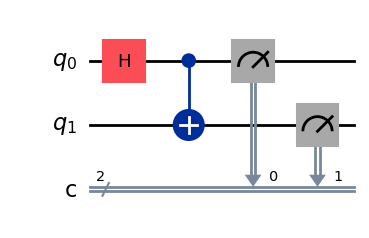

In [8]:
%matplotlib inline
circuit.draw(output='mpl')

<h3>Execute Circuit:</h3>

In [19]:

from qiskit_aer import Aer

# Transpile for the simulator
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(circuit, backend=simulator)

# Run the simulation
sim_result = simulator.run(compiled_circuit, shots=1024).result()
counts = sim_result.get_counts()

# Print the measurement counts
print(counts)

{'11': 548, '00': 476}


In [20]:
from qiskit.visualization import plot_histogram

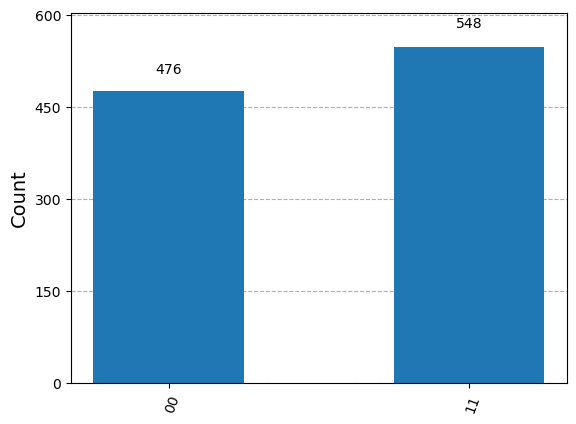

In [21]:
plot_histogram(counts)